In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO  
import pydotplus
from sklearn.metrics import classification_report

In [28]:
df = pd.read_csv('assets/car_data.csv')
len(df['User ID'].unique()) == len(df['User ID'])

True

In [29]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [30]:
binary_features = ['Gender']
continuous_feautures = ['Age','AnnualSalary']

OneHotEncoding Binary features using pandas dummies

In [31]:
df = pd.get_dummies(df, columns=binary_features, drop_first=True)

In [32]:
df.head()

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1


To check for outliers

<AxesSubplot:xlabel='User ID', ylabel='AnnualSalary'>

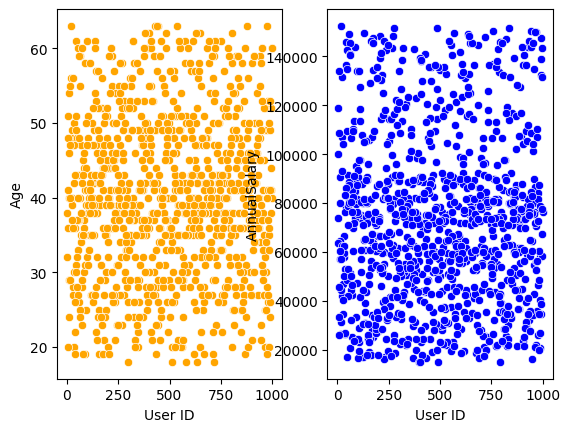

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.scatterplot(x='User ID', y='Age', data=df, ax=ax[0], color= 'orange')
sns.scatterplot(x='User ID', y='AnnualSalary', data=df, ax=ax[1], color= 'blue')

In [34]:
new_cols = [col for col in df.columns if col != 'Purchased'] + ['Purchased']
df = df[new_cols]


X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)

In [ ]:
classifier = DecisionTreeClassifier()
model = classifier.fit(X_scaled,y_train)

X_test_scaled = mms.transform(X_test)
prediction = model.predict(X_test_scaled)

In [36]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, prediction)))
print(pd.DataFrame(confusion_matrix(y_test,prediction)))

Accuracy Score is 0.91
    0   1
0  58   3
1   6  33


In [37]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        61
           1       0.92      0.85      0.88        39

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



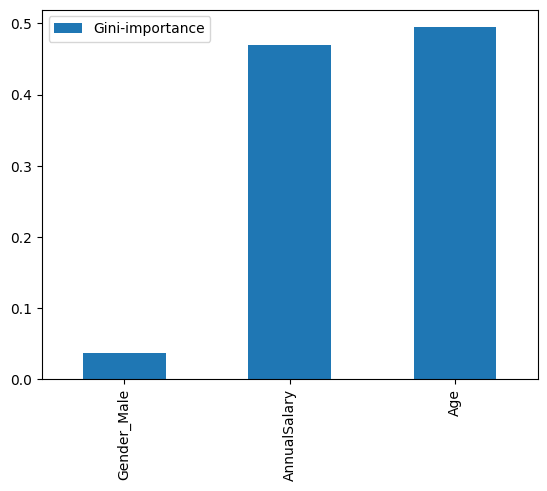

In [38]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
model.feature_importances_
importances = model.feature_importances_
indices = np.argsort(importances)

In [39]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('results/DecisionTree.png')

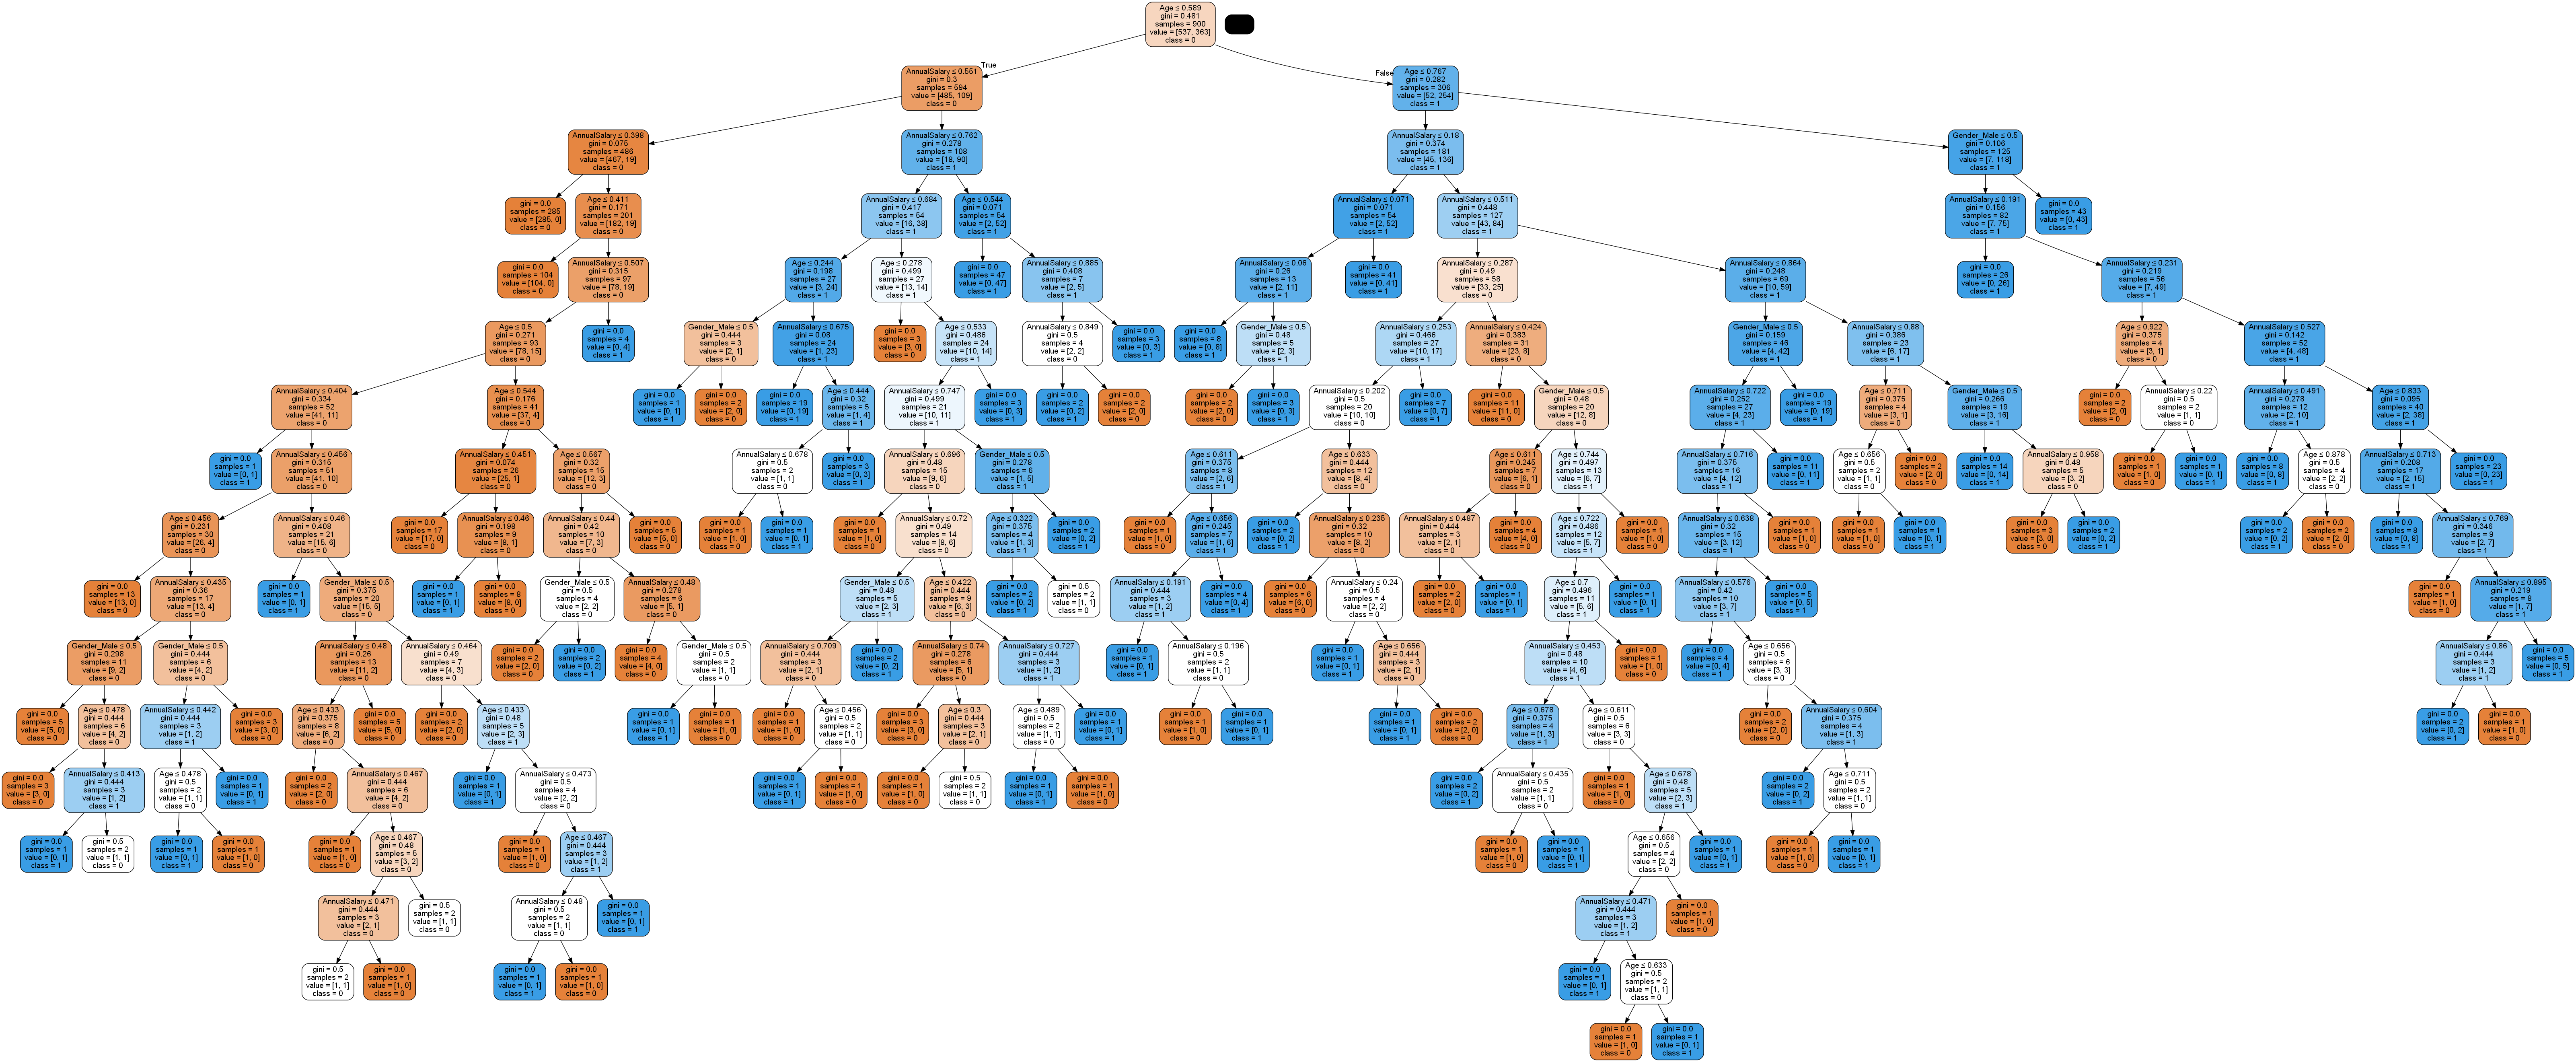

In [44]:
from PIL import Image
Image.open('results/DecisionTree.png')